In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_theme(context="notebook", style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv('../data/youtoxic_english_1000.csv')

# Display basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check unique values in categorical columns
print(f"\nUnique VideoIds: {df['VideoId'].nunique()}")
print(f"Unique CommentIds: {df['CommentId'].nunique()}")

# Examine toxicity labels distribution
toxicity_columns = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative',
                   'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist',
                   'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

print("\nToxicity Labels Distribution:")
for col in toxicity_columns:
    print(f"{col}: {df[col].value_counts().to_dict()}")

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
TextLength         0
dtype: int64
CommentId          object
VideoId            object
Text               object
IsToxic              bool
IsAbusive            bool
IsThreat             bool
IsProvocative        bool
IsObscene            bool
IsHatespeech         bool
IsRacist             bool
IsNationalist        bool
IsSexist             bool
IsHomophobic         bool
IsReligiousHate      bool
IsRadicalism         bool
TextLength          int64
dtype: object

Duplicate rows: 0

Unique VideoIds: 13
Unique CommentIds: 1000

Toxicity Labels Distribution:
IsToxic: {False: 538, True: 462}
IsAbusive: {False: 647, True: 353}
IsThreat: {False: 979, True: 21}
IsProvocative: {False: 83

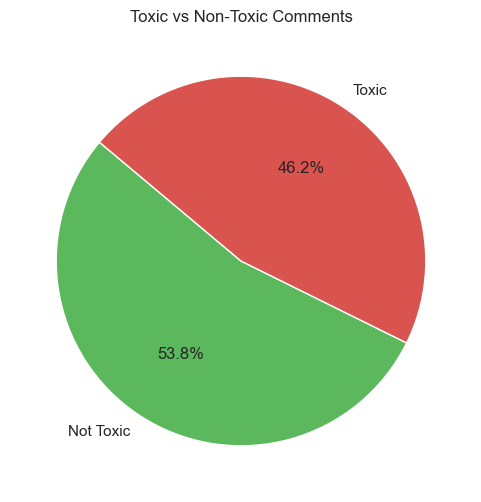

In [3]:
# Count target labels
toxic_counts = df['IsToxic'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#5cb85c', '#d9534f']
plt.pie(toxic_counts, labels=['Not Toxic', 'Toxic'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Toxic vs Non-Toxic Comments')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_8652\1391803001.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cascade_counts.index, y=cascade_counts.values, palette="mako")


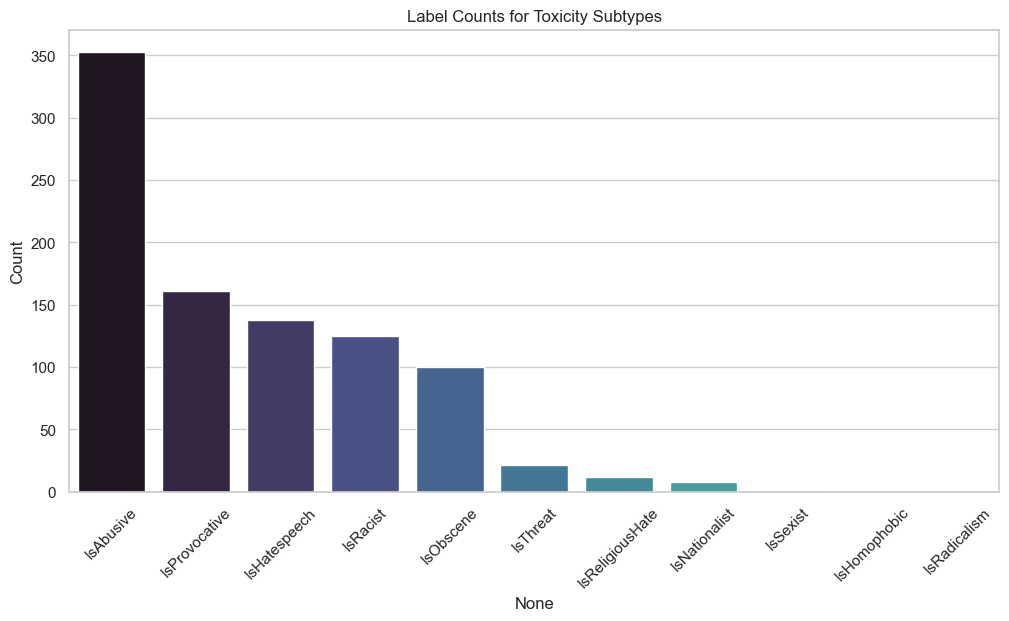

In [4]:
labels = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech',
          'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

cascade_counts = df[labels].sum().sort_values(ascending=False)

sns.barplot(x=cascade_counts.index, y=cascade_counts.values, palette="mako")
plt.title('Label Counts for Toxicity Subtypes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

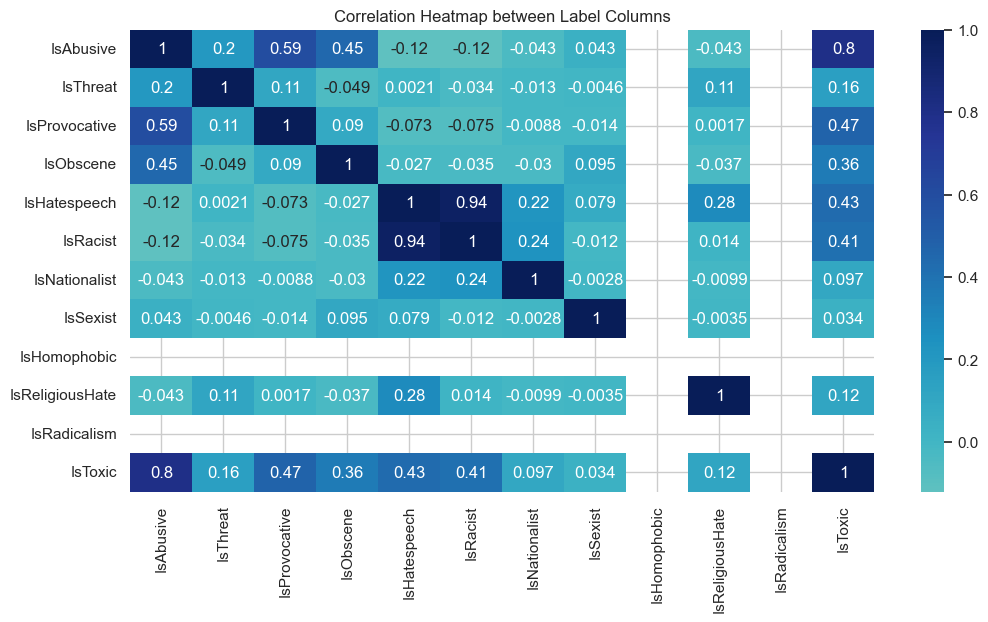

In [5]:
# Compute correlations
corr = df[labels + ['IsToxic']].corr()

sns.heatmap(corr, annot=True, cmap="YlGnBu", center=0)
plt.title('Correlation Heatmap between Label Columns')
plt.show()

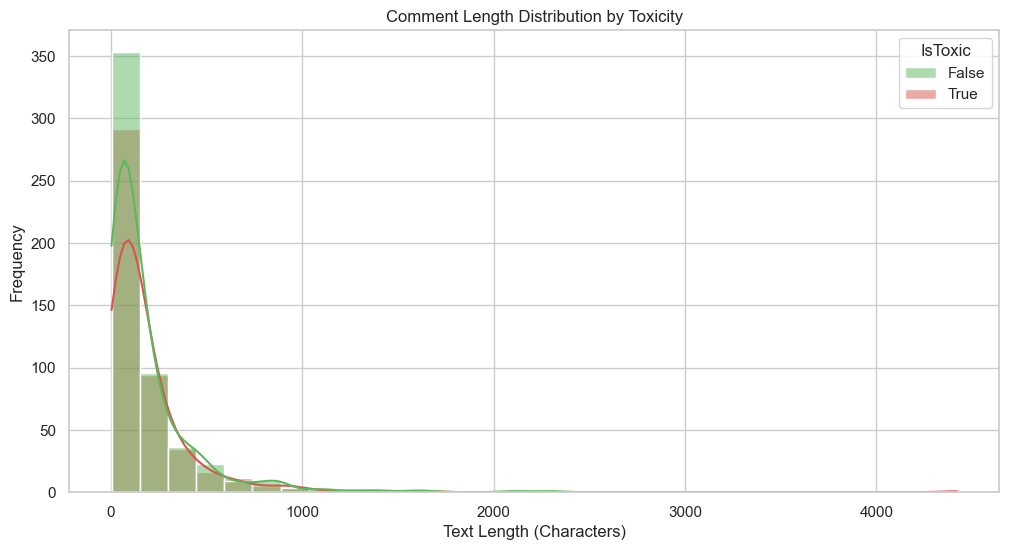

In [6]:
df['TextLength'] = df['Text'].apply(lambda x: len(str(x)))  # include str cast for safety

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='TextLength', hue='IsToxic', bins=30, palette=['#5cb85c', '#d9534f'], kde=True)
plt.title('Comment Length Distribution by Toxicity')
plt.xlabel('Text Length (Characters)')
plt.ylabel('Frequency')
plt.show()

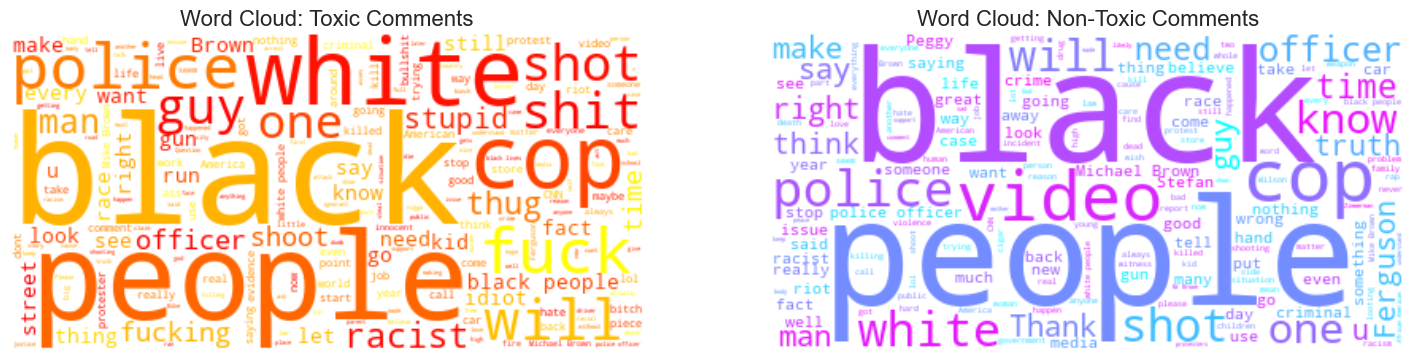

In [9]:
from wordcloud import WordCloud, STOPWORDS

toxic_text = ' '.join(df[df['IsToxic']]['Text'].astype(str))
nontoxic_text = ' '.join(df[~df['IsToxic']]['Text'].astype(str))

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
wc_toxic = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='autumn').generate(toxic_text)
wc_nontoxic = WordCloud(stopwords=STOPWORDS, background_color='white', colormap='cool').generate(nontoxic_text)
axes[0].imshow(wc_toxic, interpolation='bilinear')
axes[0].set_title('Word Cloud: Toxic Comments', fontsize=16)
axes[0].axis('off')
axes[1].imshow(wc_nontoxic, interpolation='bilinear')
axes[1].set_title('Word Cloud: Non-Toxic Comments', fontsize=16)
axes[1].axis('off')
plt.show()

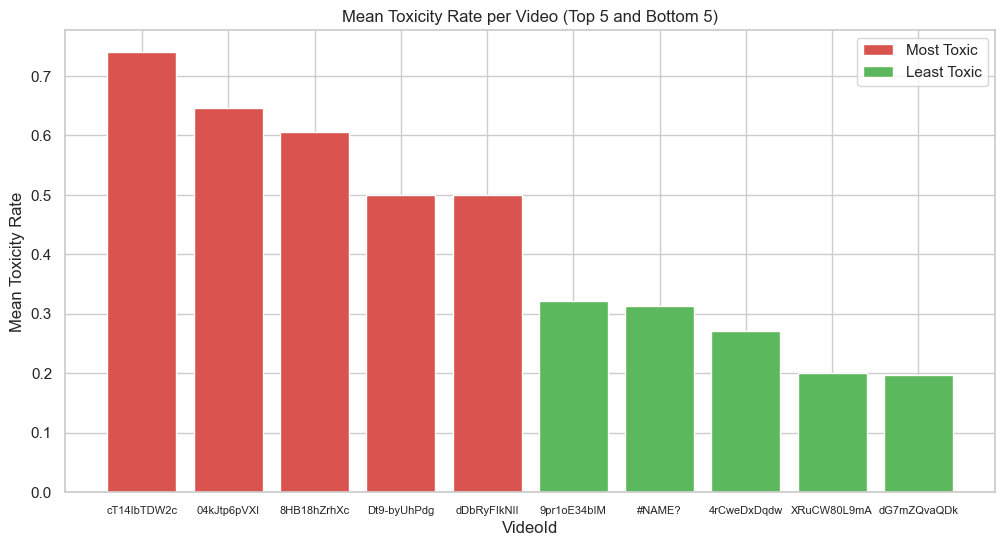

In [15]:
video_toxicity = df.groupby('VideoId')['IsToxic'].mean().sort_values(ascending=False)

top5 = video_toxicity.head(5)
bottom5 = video_toxicity.tail(5)

plt.bar(top5.index, top5.values, color='#d9534f', label='Most Toxic')
plt.bar(bottom5.index, bottom5.values, color='#5cb85c', label='Least Toxic')
plt.ylabel('Mean Toxicity Rate')
plt.xlabel('VideoId')
plt.xticks(fontsize=8)
plt.title('Mean Toxicity Rate per Video (Top 5 and Bottom 5)')
plt.legend()
plt.show()

In [19]:
summary_table = pd.DataFrame({
    'Total': df.shape[0],
    'Toxic': toxic_counts[True],
    'Non-Toxic': toxic_counts[False],
    'Percent Toxic': 100*toxic_counts[True]/df.shape[0]
}, index=[0])
print(summary_table.T)

                    0
Total          1000.0
Toxic           462.0
Non-Toxic       538.0
Percent Toxic    46.2
